In [ ]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

# Spiral arm problem

## import the data

In [3]:
df = pd.read_csv('topic3-spiral.csv')

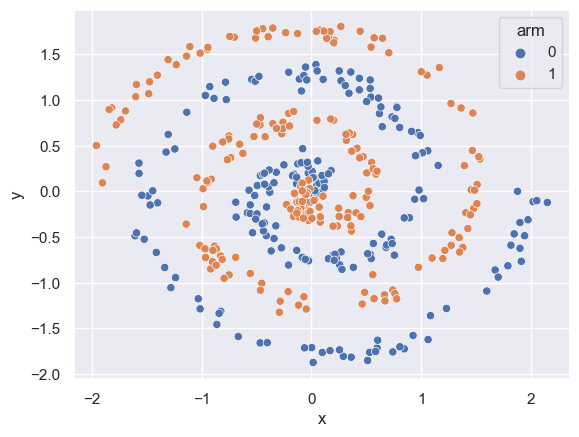

In [4]:
sns.scatterplot(data=df,x='x',y='y',hue='arm');

## build tensorflow model

In [5]:
NNmodel_adam = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(8,activation='gelu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])

NNmodel_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [6]:
xtrain = np.zeros((df.shape[0],2))
xtrain[:,0] = df['x']
xtrain[:,1] = df['y']
ytrain = df['arm']

In [7]:
NNmodel_adam.fit(xtrain,ytrain,epochs=100,batch_size=10,validation_split=0.2);

Epoch 1/100


32/32 [==============================] - 4s 30ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.7990 - val_accuracy: 0.1875
Epoch 2/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6461 - accuracy: 0.6500 - val_loss: 0.8883 - val_accuracy: 0.1875
Epoch 3/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6344 - accuracy: 0.6500 - val_loss: 0.9079 - val_accuracy: 0.1875
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6344 - accuracy: 0.6375 - val_loss: 0.7916 - val_accuracy: 0.2750
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.6594 - val_loss: 1.0229 - val_accuracy: 0.1500
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6255 - accuracy: 0.6500 - val_loss: 1.0346 - val_accuracy: 0.1125
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6151 - accuracy: 0.6656 - val_loss: 0.9513 - val_accuracy: 0.1875
Epoch 8/

32/32 [==============================] - 0s 13ms/step - loss: 0.1993 - accuracy: 0.9125 - val_loss: 0.2521 - val_accuracy: 0.9375
Epoch 56/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2147 - accuracy: 0.9250 - val_loss: 0.2183 - val_accuracy: 0.9500
Epoch 57/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1930 - accuracy: 0.9250 - val_loss: 0.2181 - val_accuracy: 0.9500
Epoch 58/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1944 - accuracy: 0.9219 - val_loss: 0.2224 - val_accuracy: 0.9500
Epoch 59/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1970 - accuracy: 0.9219 - val_loss: 0.2381 - val_accuracy: 0.9375
Epoch 60/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1995 - accuracy: 0.9250 - val_loss: 0.3274 - val_accuracy: 0.8625
Epoch 61/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2771 - accuracy: 0.9031 - val_loss: 0.2573 - val_accuracy: 0.9250
Epoch 62/100
32/

In [ ]:
grid = np.linspace(-2,2,num=51)
xg = np.zeros(51**2)
yg = np.zeros(51**2)
k=0
for x in range(51):
    for y in range(51):
        xg[k]=grid[x]
        yg[k]=grid[y]
        k+=1

xy = np.zeros((51**2,2))
xy[:,0]=xg
xy[:,1]=yg

pred = (NNmodel_adam.predict(xy)> 0.5).astype(int)

df_grid = pd.DataFrame({'x':xg,'y':yg,'arm_pred':pred.transpose()[0]})
sns.scatterplot(data=df_grid,x='x',y='y',hue='arm_pred');

### build tensorflow model with dropout

In [1]:
NNmodel_adam = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6,activation='gelu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])

NNmodel_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

NameError: name 'tf' is not defined